In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
tf.__version__

'2.10.1'

In [4]:
tf.test.is_built_with_cuda()

True

In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [6]:
x_train_new = np.zeros((x_train.shape[0], x_train.shape[1]*x_train.shape[2]))
x_train_new.shape

(50000, 1024)

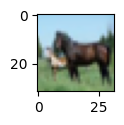

In [7]:
def plot_img(index):
    plt.figure(figsize = (10,1))
    plt.imshow(x_train[index])

plot_img(12)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [9]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [10]:
#one hot encoding
y_train_categorical = tf.keras.utils.to_categorical(y_train, num_classes =10, dtype ='float32')

In [11]:
def get_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape = (32,32,3)),    #how many value at once will be supplied  (here there are (32*32*3) MATRIX)
        tf.keras.layers.Dense(3072, activation = "leaky_relu"),
        tf.keras.layers.Dense(1536, activation = "leaky_relu"),
        tf.keras.layers.Dense(768, activation = "leaky_relu"),
        tf.keras.layers.Dense(384, activation = "leaky_relu"),
        tf.keras.layers.Dense(10, activation = "softmax")
    ])
    model.compile(optimizer = "adam",
                  loss = "categorical_crossentropy",
                  metrics = ["accuracy"])
    return model

In [ ]:
with tf.device('/GPU:0'):
    cpu_model = get_model()
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=10, restore_best_weights=True)
    cpu_model.fit( x_train_scaled, y_train_categorical, epochs = 1000, callbacks=[early_stopping])
    

Epoch 1/1000
1563/1563 [==============================] - 12s 7ms/step - loss: 2.0890 - accuracy: 0.2786
Epoch 2/1000
 631/1563 [===========>..................] - ETA: 6s - loss: 1.8308 - accuracy: 0.3381

In [ ]:
pos = 1
classes[[np.argmax(model.predict(x_test_scaled[pos]))] == classes[y_test[pos][0]]